In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('llama2_activation_diff_results.csv')

In [20]:
df.dropna(axis=0,inplace=True)

In [ ]:
min_columns = [f'layer_{i}_min_abs_diff' for i in range(32)]  # All 32 layers
df['all_layers_max_of_min'] = df[min_columns].max(axis=1)


0

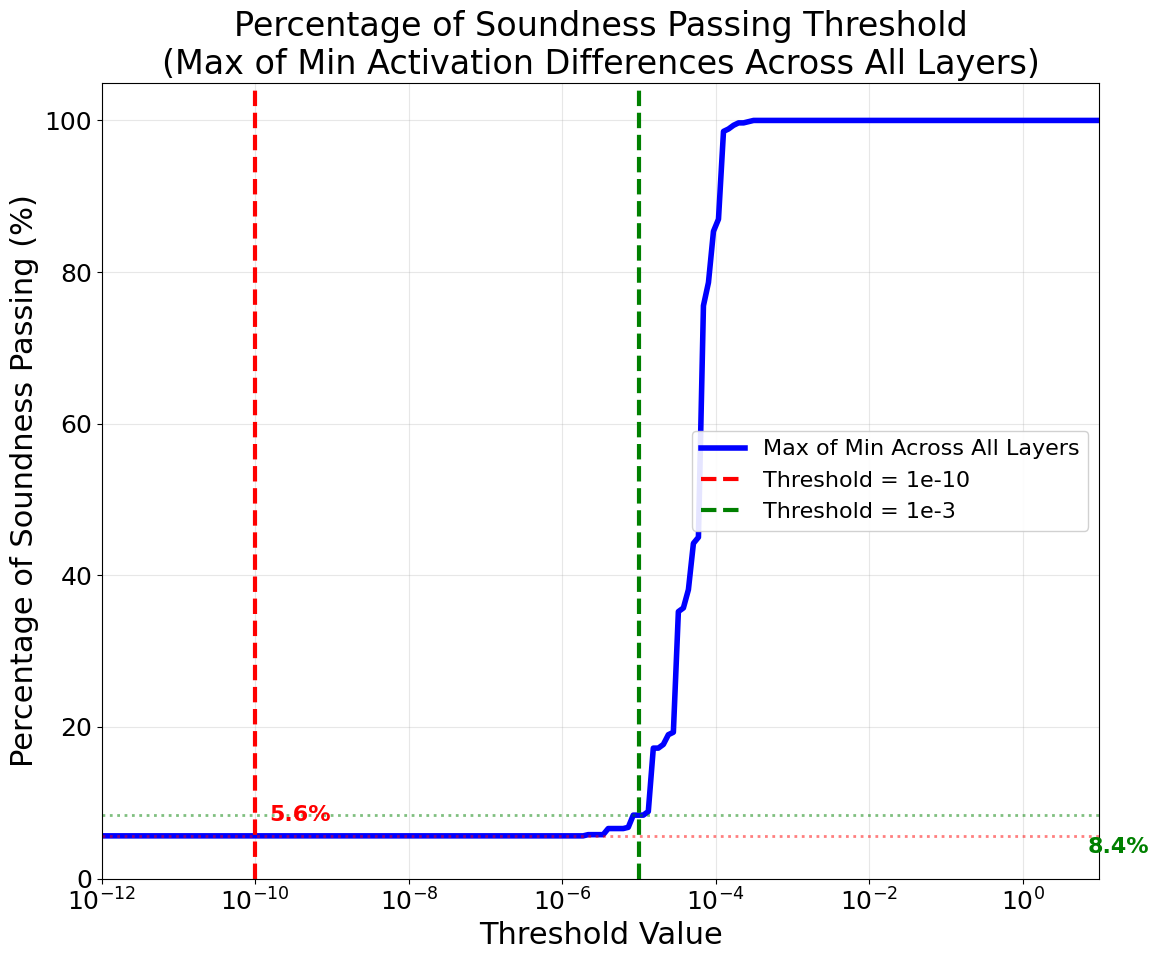


THRESHOLD ANALYSIS COMPARISON

Total samples: 622

--- Threshold = 1e-10 ---
Samples passing: 35 (5.6%)
Samples failing: 587 (94.4%)

--- Threshold = 5 ---
Samples passing: 622 (100.0%)
Samples failing: 0 (0.0%)

Summary Statistics for Max of Min values:
--------------------------------------------------
Minimum value: 0.00e+00
Maximum value: 2.75e-04
Mean value: 5.67e-05
Median value: 6.10e-05
Standard deviation: 3.78e-05

Sample Categories:
--------------------------------------------------
Very strict (≤ 1e-10): 35 samples (5.6%)
Moderate (1e-10 < x ≤ 5): 587 samples (94.4%)
Failing both (> 5): 0 samples (0.0%)

Layer Analysis - Bottleneck layers by category:
--------------------------------------------------

Bottleneck layers for MODERATE category (587 samples):
  Layer 0: 145 times (24.7%)
  Layer 1: 93 times (15.8%)
  Layer 2: 72 times (12.3%)
  Layer 3: 55 times (9.4%)
  Layer 4: 46 times (7.8%)


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('llama2_activation_diff_results.csv')
df.dropna(axis=0, inplace=True)

# Calculate max of min across all layers
min_columns = [f'layer_{i}_min_abs_diff' for i in range(32)]  # All 32 layers
df['all_layers_max_of_min'] = df[min_columns].max(axis=1)

# Set global font size
plt.rcParams.update({'font.size': 20})

# Define threshold values to test (wide range to cover both 1e-10 and 5)
thresholds = np.logspace(-12, 1, 200)  # From 1e-12 to 10

# Create single plot figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Get the max_of_min values
values = df['all_layers_max_of_min'].values

# Calculate percentage passing each threshold
percentages = []
for threshold in thresholds:
    passing = np.sum(values <= threshold) / len(values) * 100
    percentages.append(passing)

# Plot cumulative distribution
ax.semilogx(thresholds, percentages, 
           label='Max of Min Across All Layers',
           color='blue',
           linewidth=4)

# Add vertical lines at both thresholds
ax.axvline(x=1e-10, color='red', linestyle='--', linewidth=3, label='Threshold = 1e-10')
ax.axvline(x=1e-5, color='green', linestyle='--', linewidth=3, label='Threshold = 1e-3')

# Find percentages at both thresholds
passing_at_1e10 = np.sum(values <= 1e-10) / len(values) * 100
passing_at_5 = np.sum(values <= 1e-5) / len(values) * 100

# Add horizontal lines
ax.axhline(y=passing_at_1e10, color='red', linestyle=':', alpha=0.5, linewidth=2)
ax.axhline(y=passing_at_5, color='green', linestyle=':', alpha=0.5, linewidth=2)

# Add text annotations
ax.text(1.5e-10, passing_at_1e10 + 2, f'{passing_at_1e10:.1f}%', 
        fontsize=16, color='red', fontweight='bold')
ax.text(7, passing_at_5 - 5, f'{passing_at_5:.1f}%', 
        fontsize=16, color='green', fontweight='bold')

ax.set_xlabel('Threshold Value', fontsize=22)
ax.set_ylabel('Percentage of Soundness Passing (%)', fontsize=22)
ax.set_title('Percentage of Soundness Passing Threshold\n(Max of Min Activation Differences Across All Layers)', fontsize=24)

ax.legend(fontsize=16, loc='center right', framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.set_ylim(0, 105)
ax.set_xlim(1e-12, 10)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.savefig('llama2_max_of_min_two_thresholds.png', dpi=300, bbox_inches='tight')
plt.show()

# Print detailed results for both thresholds
print("\n" + "=" * 70)
print("THRESHOLD ANALYSIS COMPARISON")
print("=" * 70)
print(f"\nTotal samples: {len(values)}")

# Analysis for 1e-10
threshold1 = 1e-10
passing1 = np.sum(values <= threshold1) / len(values) * 100
print(f"\n--- Threshold = {threshold1:.0e} ---")
print(f"Samples passing: {np.sum(values <= threshold1)} ({passing1:.1f}%)")
print(f"Samples failing: {np.sum(values > threshold1)} ({100-passing1:.1f}%)")

# Analysis for 5
threshold2 = 5
passing2 = np.sum(values <= threshold2) / len(values) * 100
print(f"\n--- Threshold = {threshold2} ---")
print(f"Samples passing: {np.sum(values <= threshold2)} ({passing2:.1f}%)")
print(f"Samples failing: {np.sum(values > threshold2)} ({100-passing2:.1f}%)")

# Print statistics
print("\n" + "=" * 70)
print("Summary Statistics for Max of Min values:")
print("-" * 50)
print(f"Minimum value: {np.min(values):.2e}")
print(f"Maximum value: {np.max(values):.2e}")
print(f"Mean value: {np.mean(values):.2e}")
print(f"Median value: {np.median(values):.2e}")
print(f"Standard deviation: {np.std(values):.2e}")

# Categorize samples by thresholds
print("\n" + "=" * 70)
print("Sample Categories:")
print("-" * 50)
very_strict = np.sum(values <= threshold1)
moderate = np.sum((values > threshold1) & (values <= threshold2))
failing = np.sum(values > threshold2)

print(f"Very strict (≤ 1e-10): {very_strict} samples ({very_strict/len(values)*100:.1f}%)")
print(f"Moderate (1e-10 < x ≤ 5): {moderate} samples ({moderate/len(values)*100:.1f}%)")
print(f"Failing both (> 5): {failing} samples ({failing/len(values)*100:.1f}%)")

# Show which layers are bottlenecks for different categories
print("\n" + "=" * 70)
print("Layer Analysis - Bottleneck layers by category:")
print("-" * 50)

# For moderate category (passes 5 but fails 1e-10)
moderate_indices = np.where((values > threshold1) & (values <= threshold2))[0]
if len(moderate_indices) > 0:
    print(f"\nBottleneck layers for MODERATE category ({len(moderate_indices)} samples):")
    bottleneck_counts = {}
    
    for idx in moderate_indices:
        row_values = df.iloc[idx][min_columns].values
        max_value = df.iloc[idx]['all_layers_max_of_min']
        for i in range(len(min_columns)):
            if abs(row_values[i] - max_value) < 1e-15:
                bottleneck_counts[i] = bottleneck_counts.get(i, 0) + 1
                break
    
    sorted_layers = sorted(bottleneck_counts.items(), key=lambda x: x[1], reverse=True)
    for layer, count in sorted_layers[:5]:
        percentage = (count / len(moderate_indices)) * 100
        print(f"  Layer {layer}: {count} times ({percentage:.1f}%)")

# For failing category (fails both thresholds)
failing_indices = np.where(values > threshold2)[0]
if len(failing_indices) > 0:
    print(f"\nBottleneck layers for FAILING category ({len(failing_indices)} samples):")
    bottleneck_counts = {}
    
    for idx in failing_indices:
        row_values = df.iloc[idx][min_columns].values
        max_value = df.iloc[idx]['all_layers_max_of_min']
        for i in range(len(min_columns)):
            if abs(row_values[i] - max_value) < 1e-15:
                bottleneck_counts[i] = bottleneck_counts.get(i, 0) + 1
                break
    
    sorted_layers = sorted(bottleneck_counts.items(), key=lambda x: x[1], reverse=True)
    for layer, count in sorted_layers[:5]:
        percentage = (count / len(failing_indices)) * 100
        print(f"  Layer {layer}: {count} times ({percentage:.1f}%)")
